# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime

now = datetime.datetime.now()
Current_date = now.strftime("%m/%d/%Y")

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Created empty arrays to add to a dataframe
city = []
country = []
date = []
lon = []
lat = []
temp = []
humid = []
cloud = []
wind = []
Record = 0
Set = 0

# built partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#loop through the cities list and do a call request for information
print("Beginning Data Retrieval")
print("-"*25)

for x in cities:
    response = requests.get(query_url + x).json()
    try:

#Originally i had city.append first, but that resulted in some cities being found, but there was no information for that city.
#instead, if there was a lat, then the information was all there.

        lat.append(response['coord']['lat'])
        city.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print(f"Latitude for {x} not found.  This record was skipped")
        continue

#advance record by 1 after continuing loop
    Record = Record + 1

    if Record % 49 == 1:
        Set = Set + 1
        Record = 1
        
#output for retrieval log
    print(f"Processing record {Record} of Set {Set} | {response['name']}") 
    print(query_url + x.replace(" ", "%")) 
        

Beginning Data Retrieval
-------------------------
Processing record 1 of Set 1 | Miranda
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=miranda
Processing record 2 of Set 1 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=avarua
Processing record 3 of Set 1 | Kyshtovka
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=kyshtovka
Processing record 4 of Set 1 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=saint-philippe
Processing record 5 of Set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=vaini
Processing record 6 of Set 1 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=airai
Processing record 7 of Set 1 | Viseu
http

Processing record 5 of Set 2 | Dikson
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=dikson
Processing record 6 of Set 2 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=ponta%do%sol
Processing record 7 of Set 2 | Kongolo
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=kongolo
Processing record 8 of Set 2 | Kamenka
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=kamenka
Processing record 9 of Set 2 | Samarai
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=samarai
Processing record 10 of Set 2 | Sorland
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=sorland
Processing record 11 of Set 2 | Gat
http://api.openweathermap.org/data/2.5/weather?appid=e5

Processing record 8 of Set 3 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=sao%filipe
Processing record 9 of Set 3 | Manthani
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=manthani
Processing record 10 of Set 3 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=thompson
Latitude for belushya guba not found.  This record was skipped
Processing record 11 of Set 3 | Victoria
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=victoria
Processing record 12 of Set 3 | Nandyal
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=nandyal
Processing record 13 of Set 3 | Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=hasaki
Processing record 14 of

Processing record 10 of Set 4 | Maningrida
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=maningrida
Processing record 11 of Set 4 | Vilhena
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=vilhena
Processing record 12 of Set 4 | Regina
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=regina
Processing record 13 of Set 4 | Sesheke
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=sesheke
Processing record 14 of Set 4 | Barranca
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=barranca
Processing record 15 of Set 4 | Mareeba
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=mareeba
Latitude for karamea not found.  This record was skipped
Processing record 16 of Set 4 |

Processing record 10 of Set 5 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=pringsewu
Processing record 11 of Set 5 | Nuevo Progreso
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=nuevo%progreso
Latitude for barentsburg not found.  This record was skipped
Processing record 12 of Set 5 | Kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=kodinsk
Processing record 13 of Set 5 | Sabha
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=sabha
Processing record 14 of Set 5 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=klaksvik
Processing record 15 of Set 5 | Dwarka
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=dwarka
Latitude for marcon

Processing record 13 of Set 6 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=yar-sale
Processing record 14 of Set 6 | Atambua
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=atambua
Processing record 15 of Set 6 | Punta Cardon
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=punta%cardon
Processing record 16 of Set 6 | Ampanihy
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=ampanihy
Processing record 17 of Set 6 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=sinnamary
Processing record 18 of Set 6 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=portland
Processing record 19 of Set 6 | Mumford
http://api.openweathermap.org/data

Processing record 17 of Set 7 | Constantine
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=constantine
Processing record 18 of Set 7 | Limbang
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=limbang
Processing record 19 of Set 7 | Tura
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=tura
Processing record 20 of Set 7 | Tarakan
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=tarakan
Processing record 21 of Set 7 | Buala
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=buala
Processing record 22 of Set 7 | Constitucion
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=constitucion
Processing record 23 of Set 7 | Dali
http://api.openweathermap.org/data/2.5/weather?ap

Processing record 20 of Set 8 | Mungwi
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=mungwi
Processing record 21 of Set 8 | Surt
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=surt
Processing record 22 of Set 8 | Eureka
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=eureka
Processing record 23 of Set 8 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=saint-augustin
Processing record 24 of Set 8 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=batemans%bay
Processing record 25 of Set 8 | Kaeo
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=kaeo
Processing record 26 of Set 8 | Salym
http://api.openweathermap.org/data/2.5/weather?a

Processing record 23 of Set 9 | Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=katsuura
Latitude for chagda not found.  This record was skipped
Processing record 24 of Set 9 | La Ronge
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=la%ronge
Processing record 25 of Set 9 | Puerto Ayacucho
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=puerto%ayacucho
Processing record 26 of Set 9 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=thinadhoo
Processing record 27 of Set 9 | Iroquois Falls
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=iroquois%falls
Processing record 28 of Set 9 | Coihaique
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=coihai

Processing record 26 of Set 10 | LOS ALGARROBOS
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=los%algarrobos
Processing record 27 of Set 10 | Venado Tuerto
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=venado%tuerto
Processing record 28 of Set 10 | The Pas
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=the%pas
Processing record 29 of Set 10 | Borba
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=borba
Processing record 30 of Set 10 | Stromness
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=stromness
Processing record 31 of Set 10 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=yinchuan
Processing record 32 of Set 10 | Sun City West
http://api.op

Latitude for andevoranto not found.  This record was skipped
Processing record 27 of Set 11 | Bakchar
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=bakchar
Processing record 28 of Set 11 | Killybegs
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=killybegs
Processing record 29 of Set 11 | Aldan
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=aldan
Latitude for ust-kamchatsk not found.  This record was skipped
Processing record 30 of Set 11 | Marathon
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=marathon
Processing record 31 of Set 11 | Aksu
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54c31b1bea&units=imperial&q=aksu
Processing record 32 of Set 11 | Iskateley
http://api.openweathermap.org/data/2.5/weather?appid=e50975d645a9cc6d6efd1c54

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Put all the arrays into a dictionary
weather_dict = {
    "City": city,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind
}

#Create a dataframe from the dictionary
weather_data = pd.DataFrame(weather_dict)

#Data set had an outlier that had humidity over 100. Below conditions to remove it
new_weather_data = weather_data[weather_data['Humidity'] <= 100]

#Create a CSV file
weather_data.to_csv("weather_data.csv")

#Show partial dataframe to validate
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Miranda,92,CO,1547157443,98,3.25,-76.23,58.65,2.35
1,Avarua,40,CK,1547154000,65,-21.21,-159.78,82.40,17.22
2,Kyshtovka,32,RU,1547157692,46,56.56,76.62,-15.29,4.14
3,Saint-Philippe,90,CA,1547156640,67,45.36,-73.48,17.60,14.99
4,Vaini,0,IN,1547157693,79,15.34,74.49,57.30,2.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

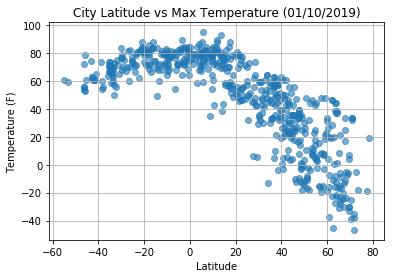

In [6]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Max Temp"], marker="o", alpha = .6)

plt.title("City Latitude vs Max Temperature" + " (" + Current_date + ")")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

### Temperature vs Latitude Observation
* The temperature goes up slightly starting in the south and then peaks at the equator and then drops as it continues north.
* The cities near the equator have the highest temperature.

#### Latitude vs. Humidity Plot

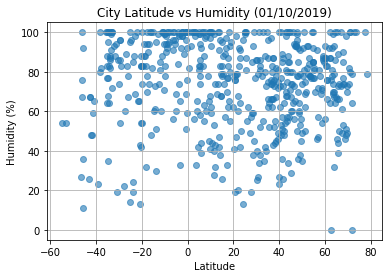

In [10]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Humidity"], marker="o", alpha = .6)

plt.title("City Latitude vs Humidity" + " (" + Current_date + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

### Humidity vs Latitude Observation
* Humidity is more concentrated at the equator.
* The cities in north have a more spead out humidity compared to cities in the south

#### Latitude vs. Cloudiness Plot

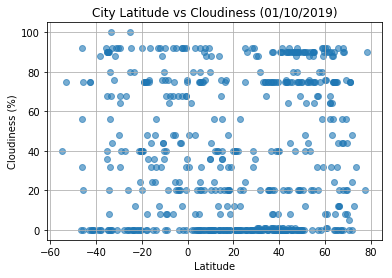

In [8]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Cloudiness"], marker="o", alpha = .6)

plt.title("City Latitude vs Cloudiness" + " (" + Current_date + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

### Cloudiness vs Latitude Observation
* The cities closer to the equator are less cloudy than those north or south

#### Latitude vs. Wind Speed Plot

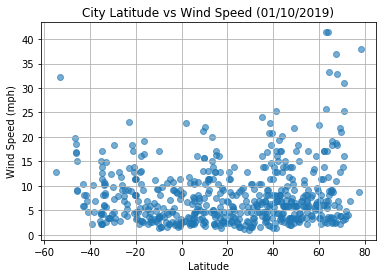

In [9]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Wind Speed"], marker="o",alpha = .6)

plt.title("City Latitude vs Wind Speed" + " (" + Current_date + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

### Cloudiness vs Latitude Observation
* It is more windy in the cities to the north